# Literacy Essentials: Core Concepts Deep Learning

This is the main Jupyter Notebook for the Pluralsight course - Literacy Essentials: Core Concepts Deep Learning by Pratheerth Padman

### The Dataset

The dataset we're going to be using throughout the session, can be found at - https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#### Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive/")

%%writefile get_data.sh
if [ ! -f healthcare-dataset-stroke-data.csv ]; then
  wget -O healthcare-dataset-stroke-data.csv https://www.dropbox.com/scl/fi/6v0ya9sl52o58cjjqzw7d/healthcare-dataset-stroke-data.csv?rlkey=m9l43egy4cg2gn8mdqrhx0kfn&dl=0
fi

Writing get_data.sh


In [ ]:
!bash get_data.sh

--2024-02-19 15:33:11--  https://www.dropbox.com/scl/fi/6v0ya9sl52o58cjjqzw7d/healthcare-dataset-stroke-data.csv?rlkey=m9l43egy4cg2gn8mdqrhx0kfn
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdbb47ba04007fa812b98c8aca2.dl.dropboxusercontent.com/cd/0/inline/CNlTKtC5Zml2ZPe8pYk7JTDNnRY9XezCRNHbbuvJo7n_776BgkyhRSvNQjBPO50_uxf8z26wFugKis_y5sNC8EYJm2xtH2UIXaCVArzzTX14fvhwLjsyD-aSKQOACWzx31wxiWRNMXeW7GPqrVN1VMF8/file# [following]
--2024-02-19 15:33:12--  https://ucdbb47ba04007fa812b98c8aca2.dl.dropboxusercontent.com/cd/0/inline/CNlTKtC5Zml2ZPe8pYk7JTDNnRY9XezCRNHbbuvJo7n_776BgkyhRSvNQjBPO50_uxf8z26wFugKis_y5sNC8EYJm2xtH2UIXaCVArzzTX14fvhwLjsyD-aSKQOACWzx31wxiWRNMXeW7GPqrVN1VMF8/file
Resolving ucdbb47ba04007fa812b98c8aca2.dl.dropboxusercontent.com (ucdbb47ba04007fa812b98c8aca2.dl.dropboxusercontent.com)..

In [ ]:
#cd 'drive/My Drive'

#### First look at the dataset!

Here, we'll be using pandas to read the downloaded csv file. We'll then print the number of rows and columns in the dataset using the shape function.

Then we'll get our first look at the dataset using the head function which by default prints out the first 5 rows of the dataset. If we want to print out the last 5 rows, we can use the tail function. We can also specify the number of rows we want to be printed out in the head or tail functions.

In [ ]:
# importing the dataset

data_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
# shape of the dataset

print("The dataset has {} rows and {} columns".format(data_df.shape[0], data_df.shape[1]))

The dataset has 5110 rows and 12 columns


In [ ]:
# first and last few rows of the dataset

data_df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#### Attribute Information

> 1) **id:** unique identifier

> 2) **gender:** "Male", "Female" or "Other"

> 3) **age:** age of the patient

> 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

> 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

> 6) **ever_married:** "No" or "Yes"

> 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

> 8) **Residence_type:** "Rural" or "Urban"

> 9) **avg_glucose_level:** average glucose level in blood

> 10) **bmi:** body mass index

> 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

> 12) **stroke:** 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### The Info Function

The info function helps us to identify the number of columns, if there are any missing values and also the type of features/variables that are in the dataset.
Here "object" means its a categorical feature and both "int64" and "float64" means it is numerical.

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Describe Function

The data describe function helps to print out some basic summary statistics like count, mean, standard deviation, max value, min value and the 25th, 50th and 75th percentile of each of the variables. It works for both numerical and categorical features, but in different ways.

In [ ]:
data_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# target variable stroke

data_df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Dealing with Missing Values

In [ ]:
data_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# fill missing bmi values with mean

data_df["bmi"].fillna(data_df["bmi"].mean(), inplace=True)

### Dealing with Categorical Features

In [ ]:
# print out the categorical data in the dataset

data_df.select_dtypes(include=["object"]).head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


#### Label Encoding

![title](le.png)

In [ ]:
# Label encoding

# import label encoder
from sklearn.preprocessing import LabelEncoder

# create label encoder instance
le = LabelEncoder()

# fit label encoder to relevat features

data_df["gender"] = le.fit_transform(data_df["gender"])

data_df["ever_married"] = le.fit_transform(data_df["ever_married"])

data_df["Residence_type"] = le.fit_transform(data_df["Residence_type"])

In [ ]:
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


#### One-Hot Encoding

![title](ohe.png)

In [ ]:
# one-hot encoding work type feature
work_type_ohe = pd.get_dummies(data_df.work_type, prefix="work")

# ohe smoking status feature
smoking_status_ohe = pd.get_dummies(data_df.smoking_status, prefix="smoking")

In [ ]:
work_type_ohe.head()

,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [ ]:
# concatenating with original dataframe
data_df = pd.concat([data_df, work_type_ohe], axis=1)

data_df = pd.concat([data_df, smoking_status_ohe], axis=1)

# remove original

data_df.drop(["work_type", "smoking_status"], axis=1, inplace=True)

data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


### Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

columns = ['avg_glucose_level','bmi','age']

scaled = std.fit_transform(data_df[['avg_glucose_level','bmi','age']])

scaled = pd.DataFrame(scaled,columns=columns)

data_df = data_df.drop(columns=columns,axis=1)

In [ ]:
data_df = pd.concat([data_df, scaled], axis=1)

data_df.head()

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,avg_glucose_level,bmi,age
0,9046,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,2.706375,1.001234e+00,1.051434
1,51676,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,2.121559,4.615554e-16,0.786070
2,31112,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,-0.005028,4.685773e-01,1.626390
3,60182,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1.437358,7.154182e-01,0.255342
4,1665,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1.501184,-6.357112e-01,1.582163


### Dropping unnecessary features

In [ ]:
# drop id column

data_df = data_df.drop("id", axis=1)

data_df.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,2.706375,1.001234e+00,1.051434
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,2.121559,4.615554e-16,0.786070
2,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,-0.005028,4.685773e-01,1.626390
3,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1.437358,7.154182e-01,0.255342
4,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1.501184,-6.357112e-01,1.582163


### Train-Test Split

In [ ]:
# splitting the data to X and y

y = data_df["stroke"]#Label

X = data_df.drop("stroke", axis=1)#Features

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Dealing with Data Imbalance

In [ ]:
# Counts of 1 and 0 before oversampling

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 160
Before OverSampling, counts of label 0: 3417 



SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# instantiating SMOTE
sm = SMOTE(random_state=2)

X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train: {}'.format(y_train_sm.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_sm == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_sm == 0)))

After OverSampling, the shape of X_train: (6834, 17)
After OverSampling, the shape of y_train: (6834,)
After OverSampling, counts of label 1: 3417
After OverSampling, counts of label 0: 3417


### Building Our Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train_sm.shape[1]

17

In [ ]:
#define model
model = Sequential()

In [ ]:
#define first hidden and visible layer
model.add(Dense(12, input_dim = X_train_sm.shape[1], activation = "relu"))

In [ ]:
# define second hidden layer
model.add(Dense(8, activation = "relu"))

In [ ]:
#define output layer
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
#define loss and optimizer
model.compile(loss = "binary_crossentropy", optimizer = "adam") # Binary Classification=CrossEntropy, MSME
#Adaptive Momemt Estimation

In [ ]:
# fit model to training data
model.fit(X_train_sm, y_train_sm, epochs = 100)

Epoch 1/100
214/214 [==============================] - 2s 2ms/step - loss: 0.5949
Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 0.4692
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 0.4172
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3940
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3789
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3658
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3529
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3425
Epoch 9/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3331
Epoch 10/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 11/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3179
Epoch 12/100
214/214 [==============================] - 0s 2ms/step - loss: 0.3117
Epoch 13/100


In [ ]:
# predictions
y_pred = model.predict(X_test)

48/48 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[1.1066636e-04],
       [1.3231031e-02],
       [4.2906159e-04],
       ...,
       [2.1358929e-03],
       [3.5911876e-01],
       [6.7691259e-02]], dtype=float32)

In [ ]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
# importing the evaluation metric

from sklearn.metrics import fbeta_score, confusion_matrix

In [ ]:
print("The Fbeta Score is -",fbeta_score(y_test, y_pred, beta=2.0))

The Fbeta Score is - 0.33003300330033003


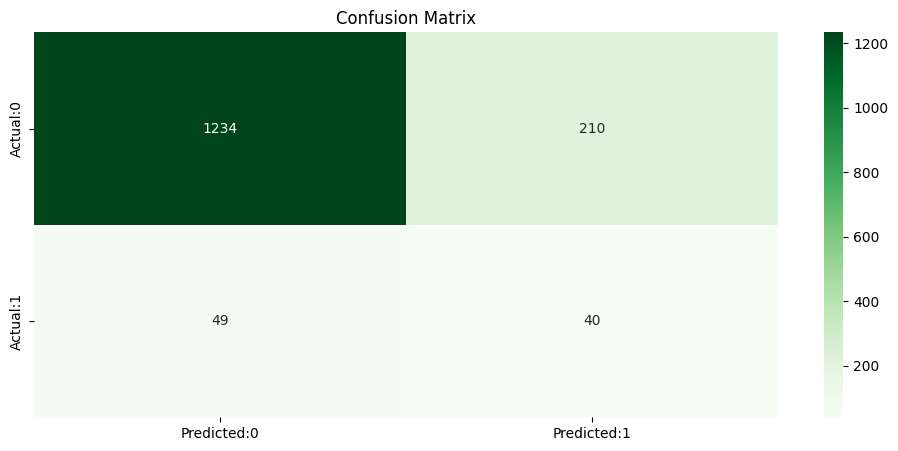

In [ ]:
plt.figure(figsize=(12,5))

cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="Greens")

plt.title("Confusion Matrix")
plt.show()